<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Shape: (569, 31)

Distribución diagnosis (0=B, 1=M):
diagnosis
0    357
1    212
Name: count, dtype: int64
diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


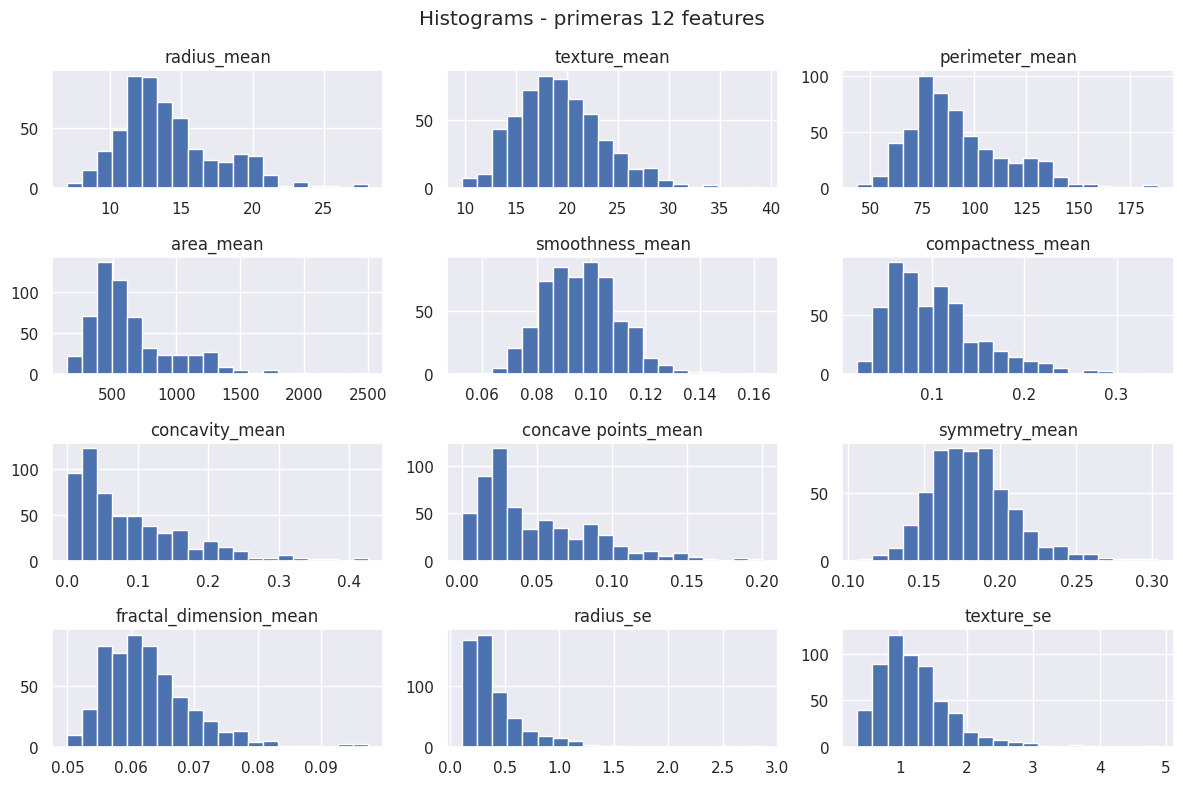

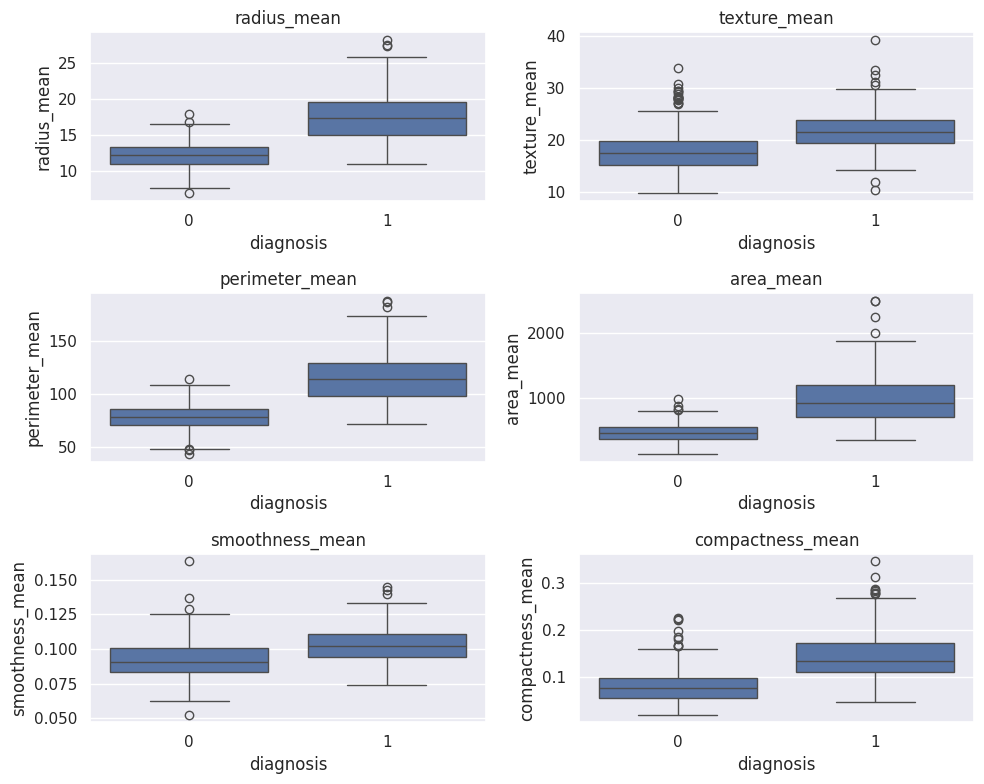

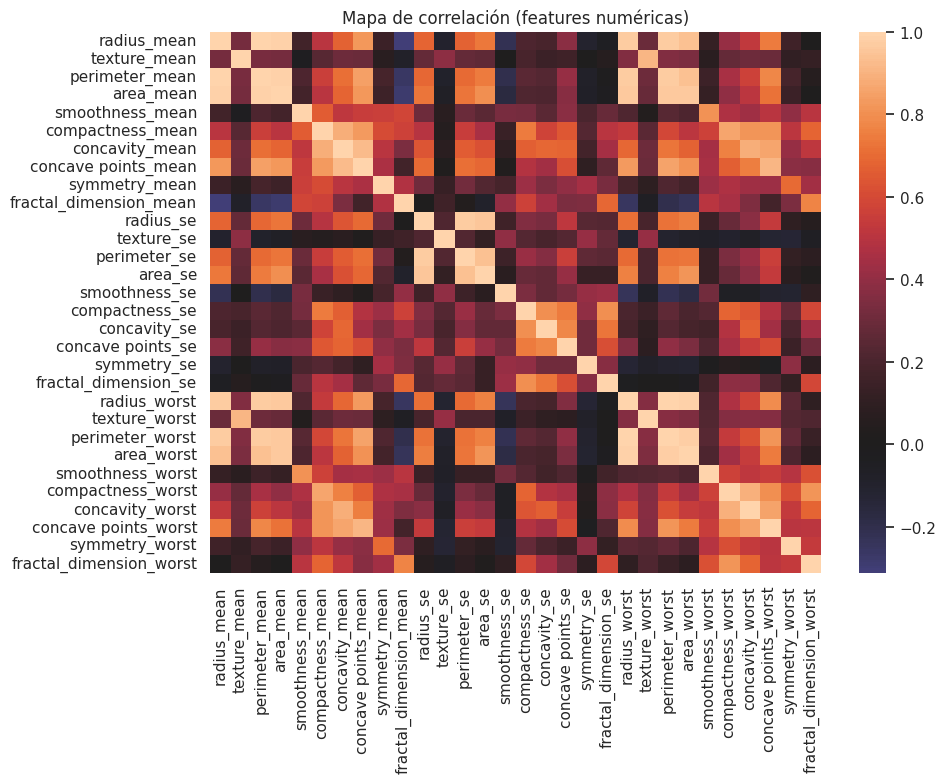


Top 10 features por correlación absoluta con 'diagnosis':
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
dtype: float64


In [10]:
RANDOM_STATE = 42

print("Shape:", df.shape)
print("\nDistribución diagnosis (0=B, 1=M):")
print(df['diagnosis'].value_counts())
print(df['diagnosis'].value_counts(normalize=True))

num_cols = df.select_dtypes(include=[np.number]).columns.drop('diagnosis', errors='ignore')

df[num_cols[:12]].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms - primeras 12 features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3,2,i)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, center=0)
plt.title("Mapa de correlación (features numéricas)")
plt.tight_layout()
plt.show()

corr_with_target = df[num_cols].corrwith(df['diagnosis']).abs().sort_values(ascending=False)
print("\nTop 10 features por correlación absoluta con 'diagnosis':")
print(corr_with_target.head(10))



2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


Varianza acumulada con 5 comps: 0.8473
Varianza acumulada con 10 comps: 0.9516
Varianza acumulada con 15 comps: 0.9865
Varianza acumulada con 20 comps: 0.9956
Varianza acumulada con 30 comps: 1.0000


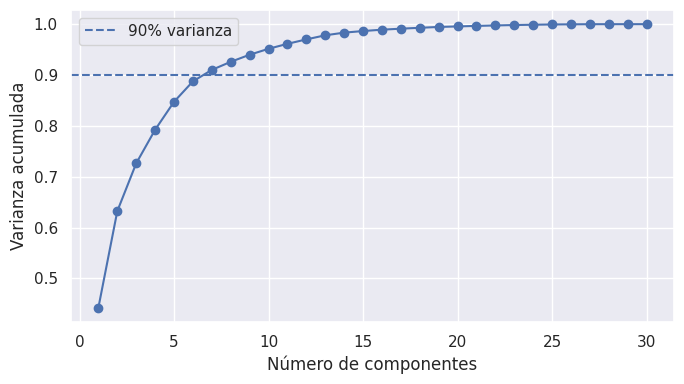

Shape original: (569, 30) Shape PCA(10): (569, 10)


In [11]:
scaler = StandardScaler()
X = df[num_cols].values
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
for i in [5,10,15,20,30]:
    if i <= len(cum_var):
        print(f"Varianza acumulada con {i} comps: {cum_var[i-1]:.4f}")

plt.figure(figsize=(7,4))
plt.plot(np.arange(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(0.9, linestyle='--', label='90% varianza')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.legend()
plt.tight_layout()
plt.show()

n_components = 10
pca10 = PCA(n_components=n_components, random_state=RANDOM_STATE)
X_pca10 = pca10.fit_transform(X_scaled)
print("Shape original:", X_scaled.shape, "Shape PCA(10):", X_pca10.shape)



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df[num_cols].values
y = df['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

models = {
    'Logistic': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
    'SVC': SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE)
}

results = {}
for name, clf in models.items():
    if name in ['Logistic', 'SVC']:
        pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    else:
        pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    results[name] = {'pipeline': pipe, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}
    print(f"\n{name} — acc: {acc:.3f}, prec: {prec:.3f}, rec: {rec:.3f}, f1: {f1:.3f}")



Logistic — acc: 0.965, prec: 0.975, rec: 0.929, f1: 0.951

RandomForest — acc: 0.974, prec: 1.000, rec: 0.929, f1: 0.963

SVC — acc: 0.974, prec: 1.000, rec: 0.929, f1: 0.963



4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


,feature,importance
23,area_worst,0.151412
27,concave points_worst,0.126497
20,radius_worst,0.093475
22,perimeter_worst,0.083642
7,concave points_mean,0.081082
2,perimeter_mean,0.077126
0,radius_mean,0.061990
6,concavity_mean,0.050818
3,area_mean,0.045916
26,concavity_worst,0.030022


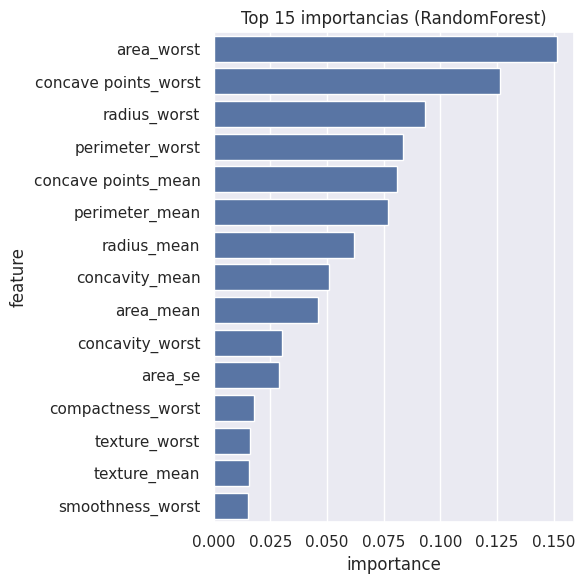

In [14]:
if 'RandomForest' in results:
    rf = results['RandomForest']['pipeline'].named_steps['clf']
    importances = rf.feature_importances_
    fi = pd.DataFrame({'feature': list(num_cols), 'importance': importances}).sort_values('importance', ascending=False)
    display(fi.head(15))
    plt.figure(figsize=(6,6))
    sns.barplot(x='importance', y='feature', data=fi.head(15))
    plt.title('Top 15 importancias (RandomForest)')
    plt.tight_layout()
    plt.show()
else:
    log = results.get('Logistic', {}).get('pipeline')
    if log:
        coef = log.named_steps['clf'].coef_.ravel()
        coef_df = pd.DataFrame({'feature': list(num_cols), 'coef': coef})
        coef_df['abs_coef'] = coef_df['coef'].abs()
        coef_df = coef_df.sort_values('abs_coef', ascending=False)
        display(coef_df.head(15))
        plt.figure(figsize=(6,6))
        sns.barplot(x='coef', y='feature', data=coef_df.head(15))
        plt.title('Top 15 coeficientes (Logistic)')
        plt.tight_layout()
        plt.show()
    else:
        print("No hay modelo apropiado entrenado para mostrar importancias.")



5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



In [15]:
summary = []
for name, info in results.items():
    summary.append([name, info['accuracy'], info['precision'], info['recall'], info['f1']])
summary_df = pd.DataFrame(summary, columns=['model','accuracy','precision','recall','f1']).sort_values('f1', ascending=False)
display(summary_df)

best = summary_df.iloc[0]
print(f"Mejor modelo: {best['model']} (f1 = {best['f1']:.3f})")

summary_df.to_csv("summary_metrics.csv", index=False)
print("Resumen guardado en summary_metrics.csv")

print("RANDOM_STATE =", RANDOM_STATE)


,model,accuracy,precision,recall,f1
1,RandomForest,0.973684,1.000,0.928571,0.962963
2,SVC,0.973684,1.000,0.928571,0.962963
0,Logistic,0.964912,0.975,0.928571,0.951220


Mejor modelo: RandomForest (f1 = 0.963)
Resumen guardado en summary_metrics.csv
RANDOM_STATE = 42


Modelo más apropiado: Basado en las métricas de rendimiento (especialmente F1-score), RandomForest y SVC son los modelos más apropiados para este conjunto de datos, ya que lograron las puntuaciones más altas y un recall elevado, crucial para un diagnóstico médico.

Impacto del preprocesamiento y reducción de dimensionalidad: El preprocesamiento (escalado) fue esencial para los modelos sensibles a la escala. La reducción de dimensionalidad con PCA permitió mantener la mayor parte de la información con menos características, lo que puede ayudar a la eficiencia y a reducir el ruido, aunque en este caso, el rendimiento de los modelos sin PCA también fue muy alto.

Mejoras y enfoques alternativos: En un escenario real, se deberían considerar más datos, ingeniería de características avanzada, modelos más complejos o ensambles, validación externa rigurosa, análisis de interpretabilidad para explicar las predicciones, análisis detallado de errores y una cuidadosa integración con el flujo de trabajo clínico y la toma de decisiones médicas.